In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/tz_opendata_z01012022_po01032022.csv', sep=';')

In [3]:
features_to_use = ['MAKE_YEAR', 'CAPACITY', 'OWN_WEIGHT', 'BODY', 'FUEL']
df_model = df[features_to_use].dropna()

In [4]:
df_model.head()

,MAKE_YEAR,CAPACITY,OWN_WEIGHT,BODY,FUEL
0,2012,1798.0,1410.0,ХЕТЧБЕК,БЕНЗИН
1,2011,1499.0,1320.0,СЕДАН,БЕНЗИН
2,2012,2993.0,2643.0,УНІВЕРСАЛ,ДИЗЕЛЬНЕ ПАЛИВО
3,2012,1987.0,1500.0,УНІВЕРСАЛ,БЕНЗИН
4,2012,1598.0,1234.0,ХЕТЧБЕК,БЕНЗИН АБО ГАЗ


In [5]:
df_model['OWN_WEIGHT'] = pd.to_numeric(df_model['OWN_WEIGHT'], errors='coerce')
df_model = df_model.dropna()

In [6]:
df_model.info()

<class 'pandas.DataFrame'>
Index: 256332 entries, 0 to 270774
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   MAKE_YEAR   256332 non-null  int64  
 1   CAPACITY    256332 non-null  float64
 2   OWN_WEIGHT  256332 non-null  float64
 3   BODY        256332 non-null  str    
 4   FUEL        256332 non-null  str    
dtypes: float64(2), int64(1), str(2)
memory usage: 11.7 MB


In [7]:
df_model = df_model[df_model['FUEL'].isin(['БЕНЗИН', 'ДИЗЕЛЬНЕ ПАЛИВО'])]

In [8]:
df_model.shape

(201599, 5)

In [9]:
df_model.head()

,MAKE_YEAR,CAPACITY,OWN_WEIGHT,BODY,FUEL
0,2012,1798.0,1410.0,ХЕТЧБЕК,БЕНЗИН
1,2011,1499.0,1320.0,СЕДАН,БЕНЗИН
2,2012,2993.0,2643.0,УНІВЕРСАЛ,ДИЗЕЛЬНЕ ПАЛИВО
3,2012,1987.0,1500.0,УНІВЕРСАЛ,БЕНЗИН
5,2012,1242.0,1141.0,ХЕТЧБЕК,БЕНЗИН


In [10]:
df_model.FUEL.value_counts()

FUEL
БЕНЗИН             114481
ДИЗЕЛЬНЕ ПАЛИВО     87118
Name: count, dtype: int64

In [11]:
df_model.FUEL.value_counts(normalize=True)

FUEL
БЕНЗИН             0.567865
ДИЗЕЛЬНЕ ПАЛИВО    0.432135
Name: proportion, dtype: float64

In [12]:
le_body = LabelEncoder()
df_model['BODY_ENCODED'] = le_body.fit_transform(df_model['BODY'])

In [13]:
X = df_model[['MAKE_YEAR', 'CAPACITY', 'OWN_WEIGHT', 'BODY_ENCODED']]
y = df_model['FUEL']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Тренувальна вибірка: {X_train.shape}")
print(f"Тестова вибірка: {X_test.shape}")

Тренувальна вибірка: (161279, 4)
Тестова вибірка: (40320, 4)


In [15]:
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_train, clf.predict(X_train)))

                 precision    recall  f1-score   support

         БЕНЗИН       0.94      0.96      0.95     91529
ДИЗЕЛЬНЕ ПАЛИВО       0.94      0.91      0.93     69750

       accuracy                           0.94    161279
      macro avg       0.94      0.93      0.94    161279
   weighted avg       0.94      0.94      0.94    161279



In [18]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

         БЕНЗИН       0.93      0.95      0.94     22952
ДИЗЕЛЬНЕ ПАЛИВО       0.93      0.90      0.92     17368

       accuracy                           0.93     40320
      macro avg       0.93      0.93      0.93     40320
   weighted avg       0.93      0.93      0.93     40320



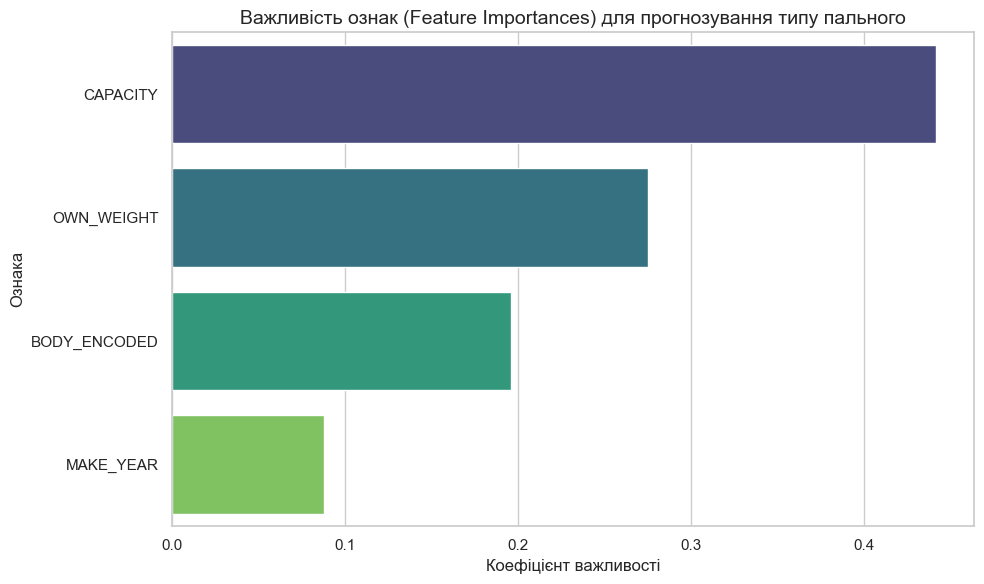

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

importances = clf.feature_importances_

feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title('Важливість ознак (Feature Importances) для прогнозування типу пального', fontsize=14)
plt.xlabel('Коефіцієнт важливості', fontsize=12)
plt.ylabel('Ознака', fontsize=12)
plt.tight_layout()
plt.show()